=== 1-1. 데이터 미리보기 ===


,sentence,target_word,label
0,Please write your home address on the form.,address,0
1,I lost the address of the restaurant.,address,0
2,Do you have a valid email address?,address,0
3,The return address is missing.,address,0
4,He gave me his business address.,address,0



=== 1-2. 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentence     200 non-null    object
 1   target_word  200 non-null    object
 2   label        200 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB
None

=== 2-1. 단어별 데이터 개수 확인 ===
target_word
address       40
account       40
present       40
contract      40
appreciate    40
Name: count, dtype: int64

=== 2-2. 라벨 분포 (0 vs 1) 확인 ===
label
0    100
1    100
Name: count, dtype: int64

=== 2-3. 결측값 확인 ===
sentence       0
target_word    0
label          0
dtype: int64


/tmp/ipython-input-3284621593.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target_word', palette='viridis')


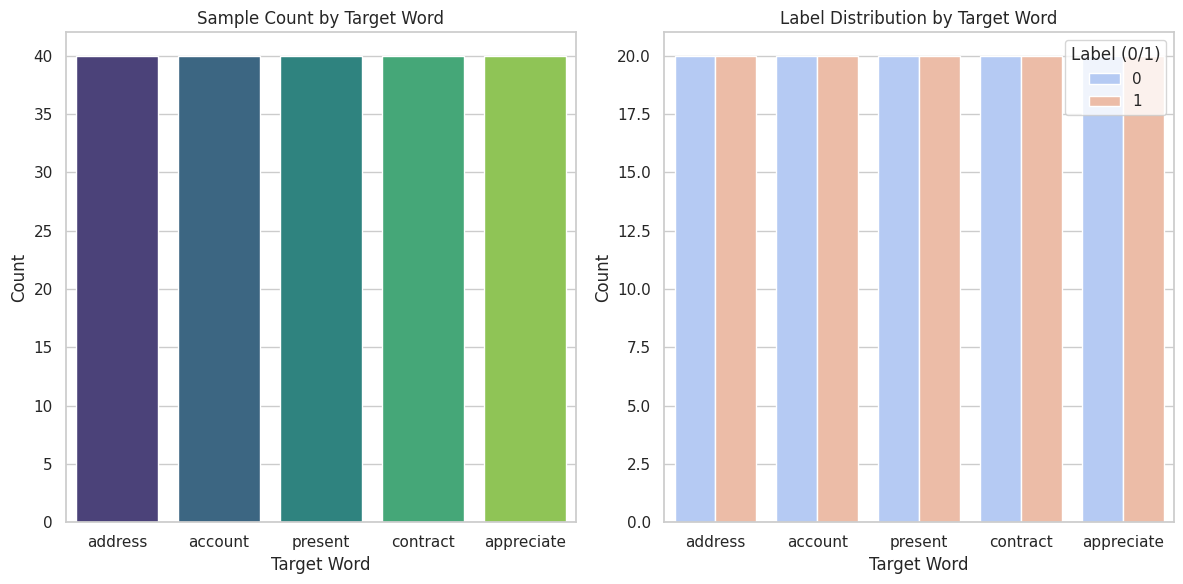


=== 4. 문장 길이 통계 ===
평균 단어 수: 5.96
최대 단어 수: 9
최소 단어 수: 3


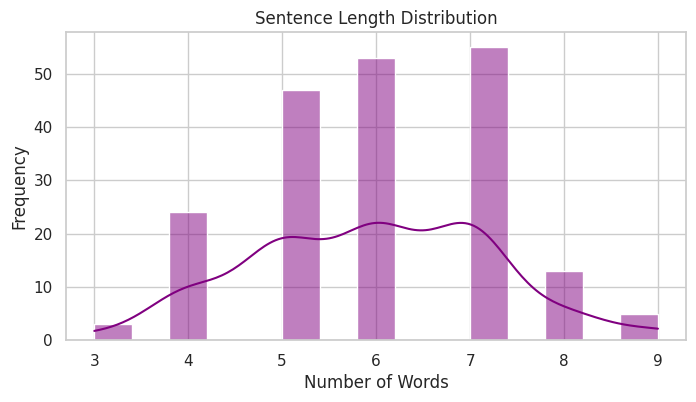


      [EDA 최종 분석 결과 요약]
1. 데이터 균형성:
   - 모든 타겟 단어에 대해 Label 0과 1의 비율이 1:1로 완벽하게 균형을 이룸.

2. 도메인 적합성:
   - 평균 문장 길이가 약 6.0 단어로, 토익 Part 5 유형과 유사함.

3. 데이터 무결성:
   - 결측치(Null) 0개로 별도의 전처리 불필요.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. 데이터 로드 및 기본 정보
# ==========================================
df = pd.read_csv('data.csv')

# 컬럼 이름 공백 제거
df.columns = df.columns.str.strip()

print("=== 1-1. 데이터 미리보기 ===")
display(df.head())

print("\n=== 1-2. 데이터 정보 ===")
print(df.info())


# ==========================================
# 2. 기본 통계
# ==========================================
print("\n=== 2-1. 단어별 데이터 개수 확인 ===")
print(df['target_word'].value_counts())

print("\n=== 2-2. 라벨 분포 (0 vs 1) 확인 ===")
print(df['label'].value_counts())

print("\n=== 2-3. 결측값 확인 ===")
print(df.isnull().sum())


# ==========================================
# 3. 시각화
# ==========================================
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 차트 1: 단어별 데이터 수
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='target_word', palette='viridis')
plt.title('Sample Count by Target Word')
plt.xlabel('Target Word')
plt.ylabel('Count')

# 차트 2: 라벨 균형 확인
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='target_word', hue='label', palette='coolwarm')
plt.title('Label Distribution by Target Word')
plt.xlabel('Target Word')
plt.ylabel('Count')
plt.legend(title='Label (0/1)')

plt.tight_layout()
plt.show()


# ==========================================
# 4. 분석 및 발견 사항
# ==========================================
df['sentence_length'] = df['sentence'].apply(lambda x: len(str(x).split()))

print(f"\n=== 4. 문장 길이 통계 ===")
print(f"평균 단어 수: {df['sentence_length'].mean():.2f}")
print(f"최대 단어 수: {df['sentence_length'].max()}")
print(f"최소 단어 수: {df['sentence_length'].min()}")

plt.figure(figsize=(8, 4))
sns.histplot(df['sentence_length'], bins=15, kde=True, color='purple')
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# ==========================================
# 5. 최종 요약
# ==========================================
print("\n" + "="*40)
print("      [EDA 최종 분석 결과 요약]")
print("="*40)
print("1. 데이터 균형성:")
print("   - 모든 타겟 단어에 대해 Label 0과 1의 비율이 1:1로 완벽하게 균형을 이룸.")
print("\n2. 도메인 적합성:")
print(f"   - 평균 문장 길이가 약 {df['sentence_length'].mean():.1f} 단어로, 토익 Part 5 유형과 유사함.")
print("\n3. 데이터 무결성:")
print("   - 결측치(Null) 0개로 별도의 전처리 불필요.")
print("="*40)